In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../')
import classify

/Users/Can/venv/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
CALIBRATION_FILE = "../../calibration/out/C.mat"
TEST_FOLDER = "../../experiment_data/blue_feet/"
TEST_FILE = TEST_FOLDER + "/4/2016.10.08_20.45.13_trial_imudata.txt"

In [3]:
DATA_FOLDER ="/Users/Can/biomimetics/veloplot/blue_feet_predictions/"
CTL_FILES = DATA_FOLDER + "4/0/" + "*.csv"  # No touch data
ACT_FILES = DATA_FOLDER + "4/1/" + "*.csv"  # Touch data

In [4]:
test_data, df, df_segs = classify.get_test_data(TEST_FILE, CALIBRATION_FILE)

In [5]:
print len(df_segs)

59


## Random Forest Predictions

CTL size: 224 ACT size: 277
[0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0
 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1
 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0

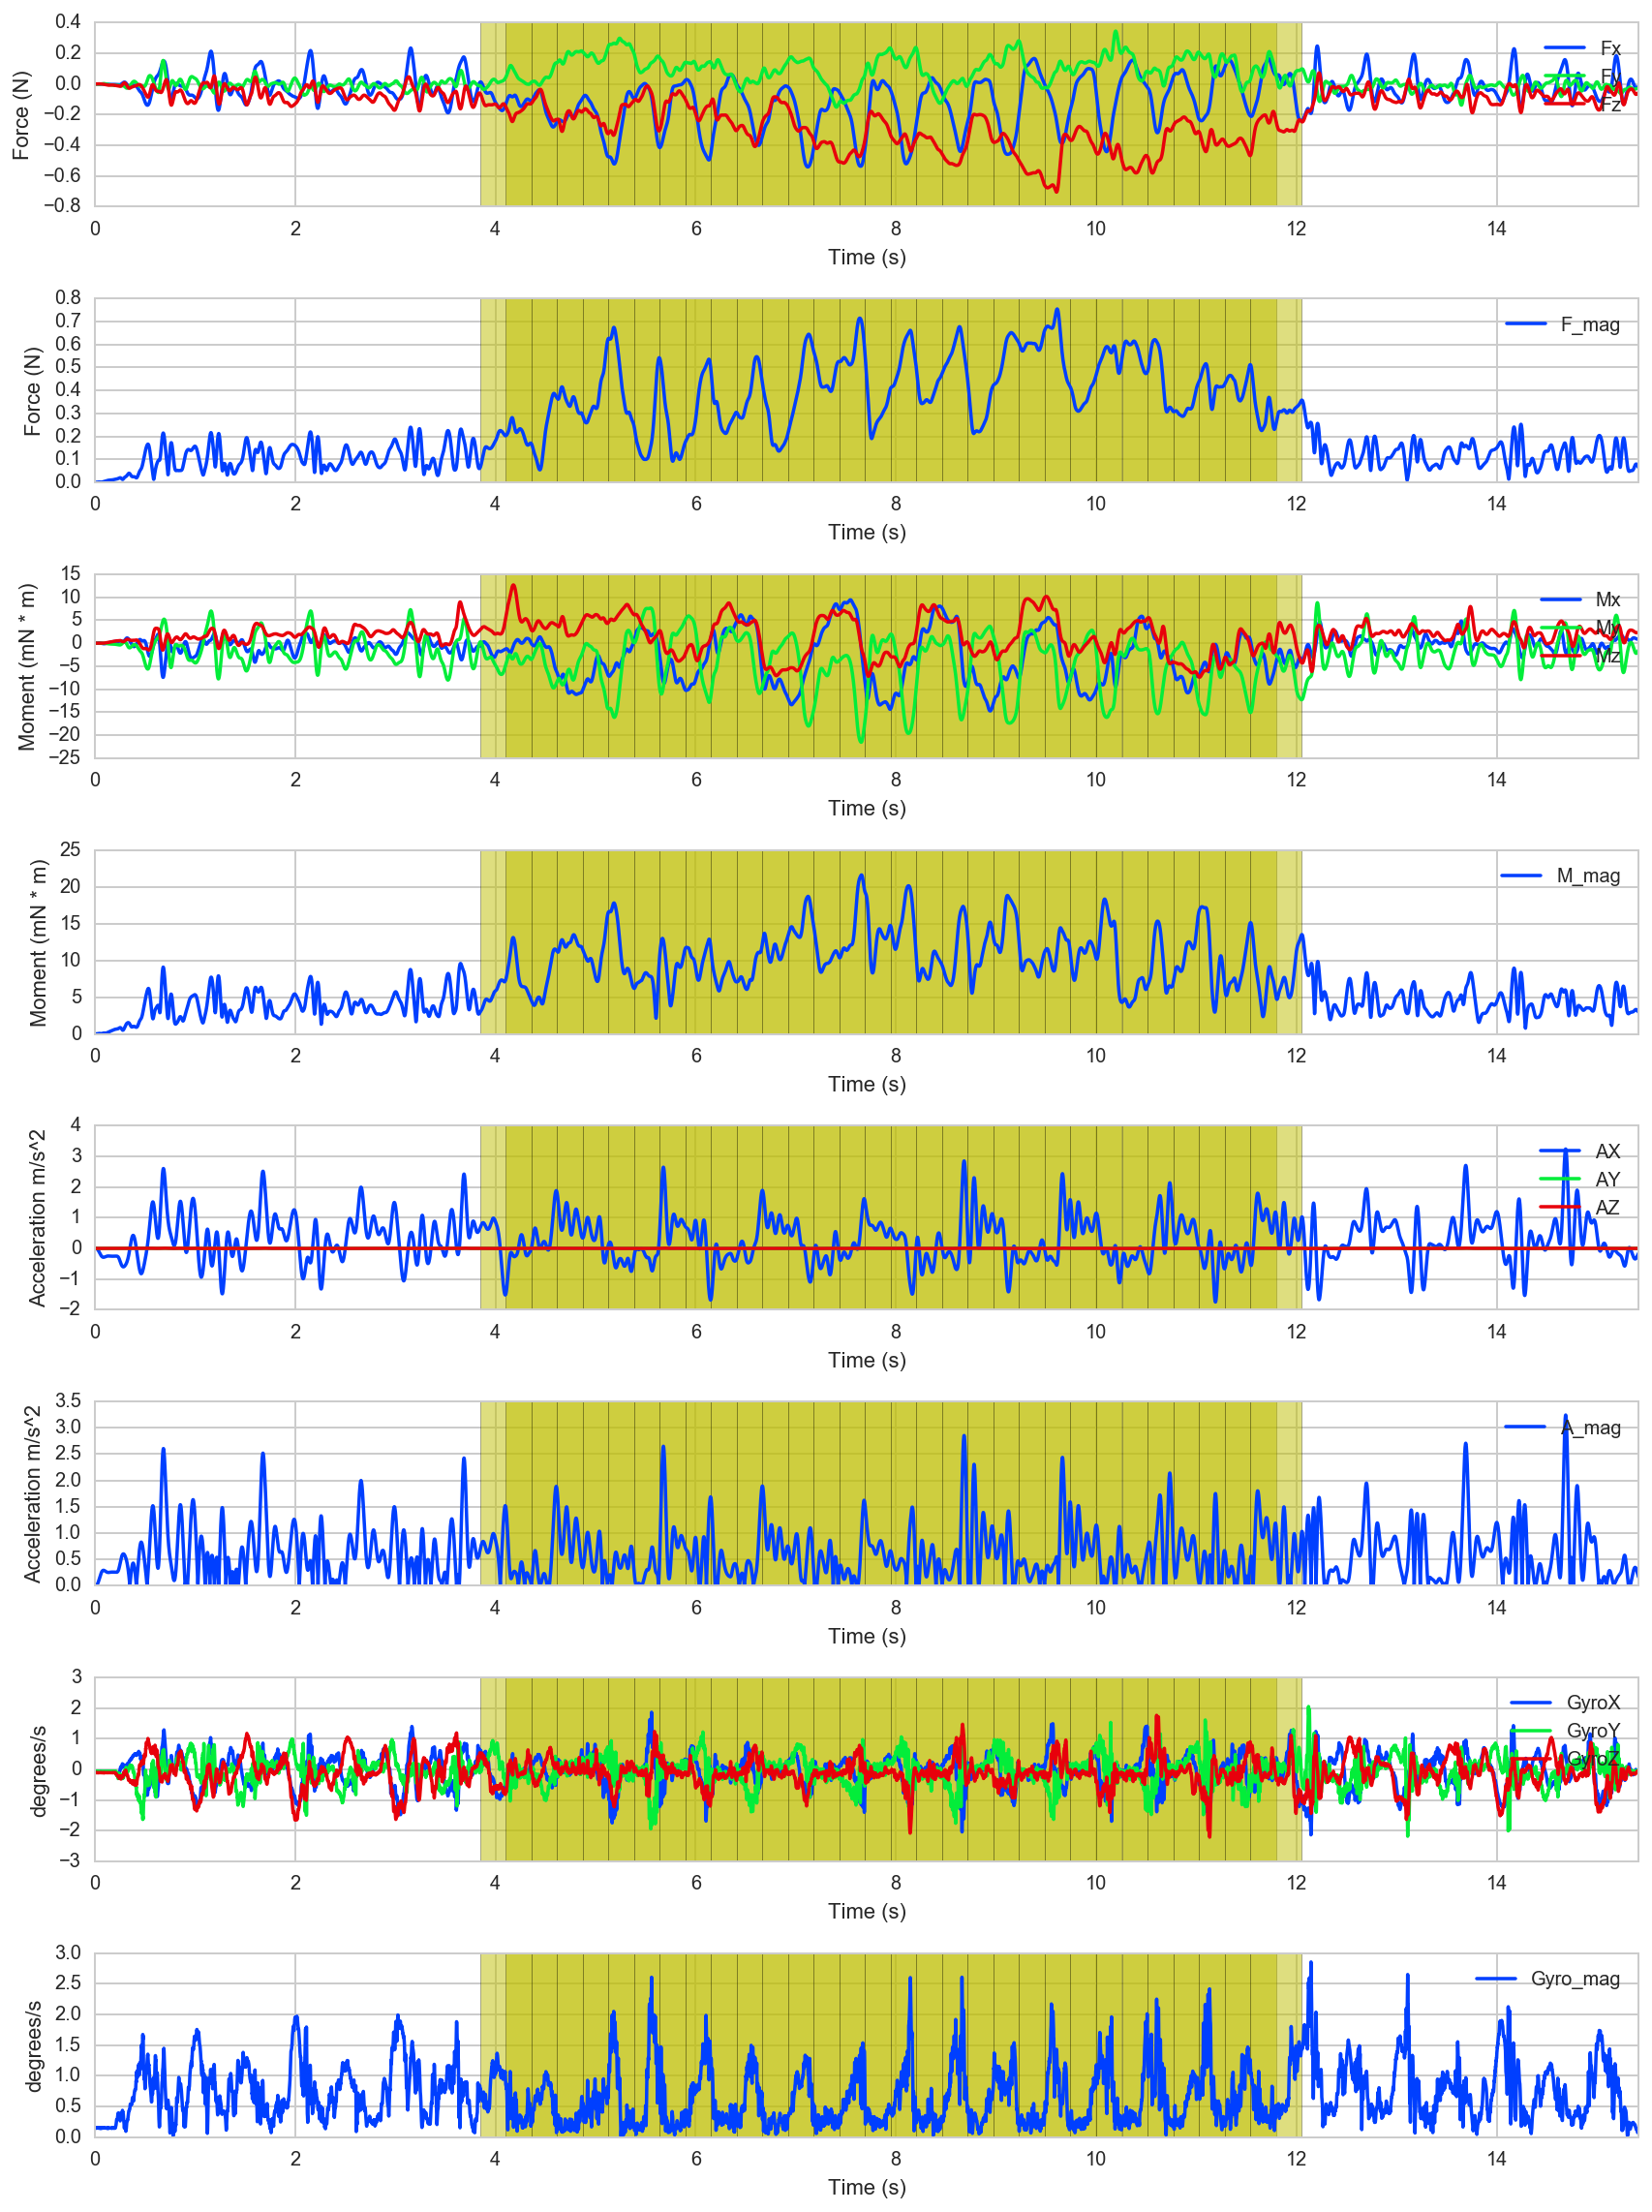

ValueError: too many values to unpack

In [6]:
rf_preds, rf_clf= classify.clf_predict_and_visualize(classify.random_forests(),test_data,df,df_segs,columns=[["Fx", "Fy", "Fz"], "F_mag", ["Mx", "My", "Mz"], "M_mag",
                 ["AX", "AY", "AZ"], "A_mag", ["GyroX", "GyroY", "GyroZ"],
                 "Gyro_mag"],display=True,save_figure=False,output_dir="out/",output_filename="preds_vis.png",ctl_files=CTL_FILES,act_files=ACT_FILES)

## SVM Predictions

In [ ]:
svm_preds, svm_clf, scaler = classify.clf_predict_and_visualize(classify.svc(),test_data,df,df_segs,columns=[["Fx", "Fy", "Fz"], "F_mag", ["Mx", "My", "Mz"], "M_mag",
                 ["AX", "AY", "AZ"], "A_mag", ["GyroX", "GyroY", "GyroZ"],
                 "Gyro_mag"],display=True,save_figure=False,output_dir="out/",output_filename="preds_vis.png",ctl_files=CTL_FILES,act_files=ACT_FILES)

In [ ]:
test_data = scaler.transform(test_data)
svm_scores = svm_clf.decision_function(test_data)
print svm_preds.shape
print svm_scores.shape
true_labels = 

    
    